<a href="https://colab.research.google.com/github/ivysochyn/kck-solutions/blob/1-make-solutions-for-5/001_KCK_ZAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise
## Description
We have 5 `.csv` files representing evolution algorithms, the goal is to build graph(s) using `matplotlib.pyplot` library. 

## Solution for 3.0

In [2]:
# Write function to load and get data plus labels
import pandas as pd
from typing import Tuple
def load_from_csv(path: str)-> Tuple['DataFrame', 'DataFrame']:
  """
  Extracts data from .csv file.

  Parameters
  ----------
  path: str
    Path to .csv file.

  Returns:
  --------
  Tuple['DataFrame', 'DataFrame]
    Tuple containing labels and values dataframes
  """
  data = pd.read_csv(path)
  values = data.loc[:, ~data.columns.isin(['generation', 'effort'])]
  labels = data.loc[:, "effort"]
  return labels, values

In [3]:
import matplotlib.pyplot as plt
from typing import List

def plot_means(files: List[str]):
  """
  Plots means of values defined in provided files.

  Parameters
  ----------
  files: List[str]
    List of files to process and plot data from.
  """
  plt.figure(figsize=(10,6))
  for file in files:
    efforts, runs = load_from_csv(file)
    mean_runs = runs.mean(axis=1)
    plt.plot(efforts, mean_runs, label=file, linewidth=2)
  plt.tick_params(axis='both', labelsize=12)
  plt.legend(loc='lower right', fontsize=12)
  plt.xlabel("Rozegranych gier", fontsize=16, labelpad=15)
  plt.ylabel("Odsetek wygranych gier", fontsize=16, labelpad=15)
  plt.xlim([0, max(efforts)+0.5])
  plt.show()
  return

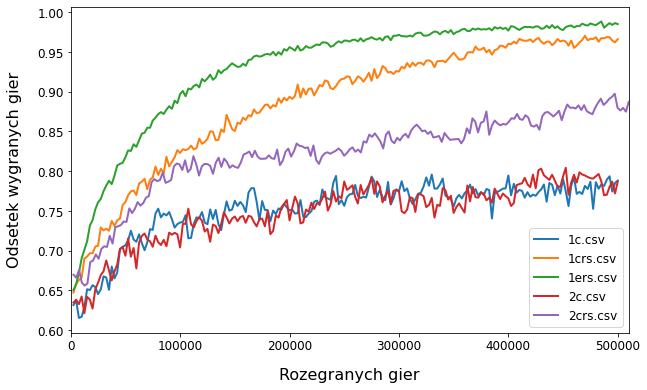

In [4]:
# WARNING: files have to be presented in path program was runned
# In case you're runnin the code using colab - import necessary files first.
plot_means(["1c.csv", "1crs.csv", "1ers.csv", "2c.csv", "2crs.csv"])

## Solution for 5.0

## Resources
📚 Examples from matplotlib: https://matplotlib.org/stable/gallery/statistics/index.html

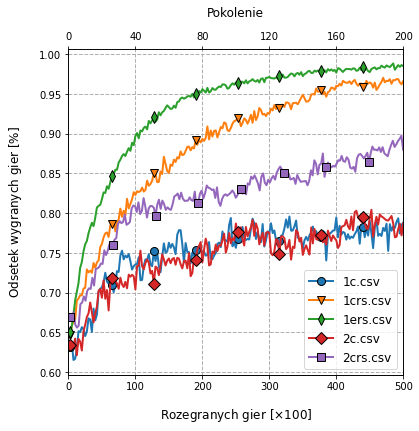

In [31]:
import matplotlib.pyplot as plt
from typing import List
import numpy as np

def plot_advanced(files: List[str]):
  """
  Plots means of values of data defined in provided files.

  Parameters
  ----------
  files: List[str]
    List of files to process and plot data from.
  """
  labels = list()
  fig = plt.figure(figsize=(6,6))
  ax1 = fig.add_subplot(111)
  formats = [dict(marker=types, markeredgecolor="black", markersize=8) for types in ["o", "v", "d", "D", "s"]]
  for file, marker in zip(files, formats):
    efforts, runs = load_from_csv(file)
    mean_runs = runs.mean(axis=1)
    ax1.plot(efforts, mean_runs, **marker, label=file, linewidth=2, markevery=25)
    labels.append(file)
  plt.tick_params(axis='both', labelsize=10)
  ax1.set_xlabel(r"Rozegranych gier $[\times100]$", fontsize=12, labelpad=15)
  ax1.set_ylabel(r"Odsetek wygranych gier $[\%]$", fontsize=12, labelpad=15)
  ax1.legend(loc='lower right', fontsize=12)
  ax1.grid(True, linestyle='--', linewidth=1)
  ax1.set_xlim([0, 500000 + 0.5])
  ax2 = ax1.twiny()
  ax1.set_xticklabels([str(num) for num in range(0, 500 + 1, 100)])
  ax2.set_xticklabels([str(num) for num in range(0, len(efforts) + 1, 40)])
  ax2.set_xlabel(r"Pokolenie", fontsize=12, labelpad=15)
  return
plot_advanced(["1c.csv", "1crs.csv", "1ers.csv", "2c.csv", "2crs.csv"])

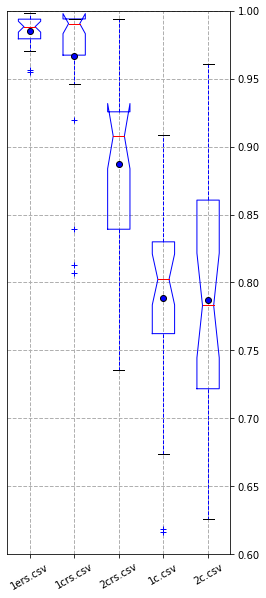

In [32]:
def plot_boxes(files: List[str]):
  """
  Plots box graph of mean values defined in provided files.
  Uses the last line of data in every provided file to make a plot.

  Parameters
  ----------
  files: List[str]
    List of files to process and plot data from.
  """
  data = list()
  fig, ax = plt.subplots(figsize=(4,10))
  for file in files:
    _, efforts = load_from_csv(file)
    data.append(efforts.iloc[-1])
  data_medians = [x.mean() for x in data]
  files = [x for _,x in sorted(zip(data_medians,files), reverse=True)]
  ax.set_xticklabels(files)
  ax.set_ylim([0.6, 1.0])
  ax.xaxis.set_tick_params(rotation=30, labelsize=10)
  ax.tick_params(right=True, labelright=True, left=False, labelleft=False)
  data.sort(key = lambda x: x.mean(), reverse=True)
  medianprops = dict(color='red')
  meanprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='blue')
  boxprops=dict(color='blue')
  whiskerprops=dict(color='blue', linestyle="--")
  flierprops=dict(marker='+', markeredgecolor='blue')
  plt.boxplot(data, notch=True, showmeans=True, showfliers=True,
              meanprops=meanprops, boxprops=boxprops, whiskerprops=whiskerprops,
              flierprops=flierprops, medianprops=medianprops)
  plt.grid(True, linestyle="--", linewidth=1)
  return

data = plot_boxes(["1c.csv", "1crs.csv", "1ers.csv", "2c.csv", "2crs.csv"])

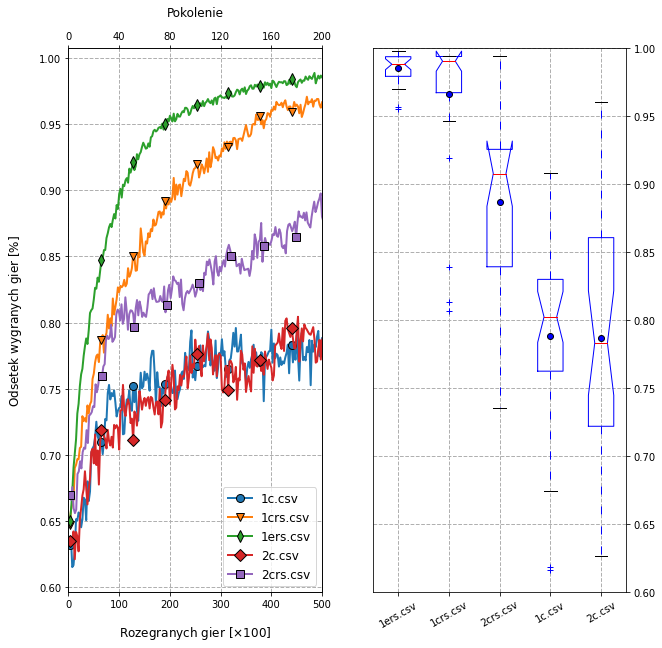

In [33]:
def plot_data(files: List[str]):
  """
  Plots regular and box graphs of mean values provided in files.
  Uses the last line of data in every provided file to make a box plot.

  Parameters
  ----------
  files: List[str]
    List of files to process and plot data from.
  """
  
  # Define subplot to locate plots
  fig, (ax1, ax) = plt.subplots(1, 2, figsize=(10,10))
  
  # Define marker styles
  formats = [dict(marker=types, markeredgecolor="black", markersize=8)
             for types in ["o", "v", "d", "D", "s"]]
  
  # Plot data from files with markerks on first graph
  for file, marker in zip(files, formats):
    efforts, runs = load_from_csv(file)
    mean_runs = runs.mean(axis=1)
    ax1.plot(efforts, mean_runs, **marker, label=file, linewidth=2,
             markevery=25)
  
  # Define first graph appearance
  plt.tick_params(axis='both', labelsize=10)
  ax1.set_xticklabels([str(num) for num in range(0, 500 + 1, 100)])
  ax1.set_xlabel(r"Rozegranych gier $[\times100]$", fontsize=12, labelpad=15)
  ax1.set_ylabel(r"Odsetek wygranych gier $[\%]$", fontsize=12, labelpad=15)
  ax1.legend(loc='lower right', fontsize=12)
  ax1.grid(True, linestyle='--', linewidth=1)
  ax1.set_xlim([0, 500000 + 0.5])
  
  # Create a copy of x axis and set ticks there
  ax2 = ax1.twiny()
  ax2.set_xticklabels([str(num) for num in range(0, len(efforts) + 1, 40)])
  ax2.set_xlabel(r"Pokolenie", fontsize=12, labelpad=15)
  
  # Get data for 2nd graph from the last line of every line
  data = list()
  for file in files:
    _, efforts = load_from_csv(file)
    data.append(efforts.iloc[-1])

  # Sort data and labels with respect to mean values of runs
  data_medians = [x.mean() for x in data]
  files = [x for _,x in sorted(zip(data_medians,files), reverse=True)]

  # Define second graph appearance
  ax.set_xticklabels(files)
  ax.tick_params(right=True, labelright=True, left=False, labelleft=False)
  ax.xaxis.set_tick_params(rotation=30, labelsize=10)
  ax.set_ylim([0.6, 1.0])
  ax.grid(True, linestyle="--", linewidth=1)

  # Styles for boxes
  medianprops = dict(color='red')
  meanprops = dict(marker='o', markeredgecolor='black',
                      markerfacecolor='blue')
  boxprops=dict(color='blue')
  whiskerprops=dict(color='blue', linestyle="--", dashes=(8, 12),)
  flierprops=dict(marker='+', markeredgecolor='blue')

  # Sort data with respect to mean value 
  data.sort(key = lambda x: x.mean(), reverse=True)

  # Plot second graph
  ax.boxplot(data, notch=True, showmeans=True, showfliers=True,
              meanprops=meanprops, boxprops=boxprops, whiskerprops=whiskerprops,
              flierprops=flierprops, medianprops=medianprops)
  return

plot_data(["1c.csv", "1crs.csv", "1ers.csv", "2c.csv", "2crs.csv"])